### Imorting Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns

### Importing dataset

In [2]:
forest_data=pd.read_csv('forestfires.csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Data understanding

In [3]:
forest_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [4]:
forest_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### Data preprocessing

In [9]:
#Dropping the month and day columns
forest_data=forest_data.drop(labels=['month','day'], axis=1)
forest_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [41]:
forest_data.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

### Model Building

In [11]:
X=forest_data.drop(labels='size_category', axis=1)
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y=forest_data[['size_category']]
y

,size_category
0,small
1,small
2,small
3,small
4,small
...,...
512,large
513,large
514,large
515,small


In [15]:
#Normalising the data as there is scale difference
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state= 12,stratify=y)
X_train.shape,y_train.shape

((413, 28), (413, 1))

In [18]:
X_test.shape,y_test.shape

((104, 28), (104, 1))

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
encoded_y=le.fit_transform(y)
encoded_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

## Kernel Linear 

### Model Training  | Model Testing | Model Evaluation



Overall Accuracy :  0.9326923076923077
AUC Score        :  0.875
AccuracyScore    :  0.9326923076923077
Recall           :  1.0
Precision        :  0.9156626506024096
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

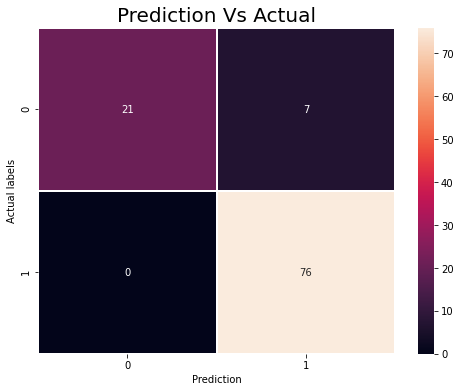

In [66]:
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

import warnings 
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test = train_test_split(scaled_X,encoded_y,test_size = 0.20,random_state = 12,stratify = encoded_y)

svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)



print("Overall Accuracy : ",accuracy_score(y_test,y_pred))
print("AUC Score        : ",roc_auc_score(y_test,y_pred))
print("AccuracyScore    : ",accuracy_score(y_test,y_pred))


print("Recall           : ",recall_score(y_test,y_pred))
print("Precision        : ",precision_score(y_test,y_pred))

print("Confusion Matrix :")

plt.figure(figsize = (8,6))

confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8)
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

### Kernel - Rbf

Overall Accuracy :  0.9326923076923077
AUC Score        :  0.875
AccuracyScore    :  0.9326923076923077
Recall           :  1.0
Precision        :  0.9156626506024096
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

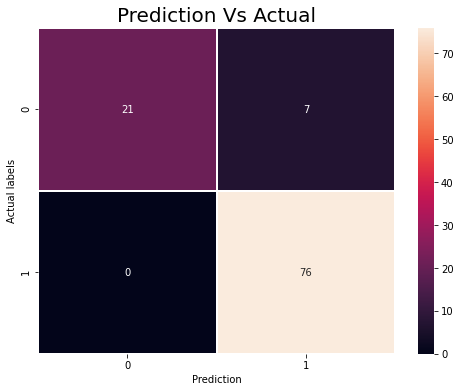

In [69]:
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

import warnings 
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test = train_test_split(scaled_X,encoded_y,test_size = 0.20,random_state = 12,stratify = encoded_y)

svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)



print("Overall Accuracy : ",accuracy_score(y_test,y_pred))
print("AUC Score        : ",roc_auc_score(y_test,y_pred))
print("AccuracyScore    : ",accuracy_score(y_test,y_pred))


print("Recall           : ",recall_score(y_test,y_pred))
print("Precision        : ",precision_score(y_test,y_pred))

print("Confusion Matrix :")

plt.figure(figsize = (8,6))

confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8)
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)